# Логистическая регрессия с нуля

## Содержание

1. Бинарная классификация с двумя параметрами на iris.csv  
2. Бинарная классификация с четырьмя параметрами на iris.csv

## 1. Бинарная классификация с двумя параметрами на iris.csv 

### Предобработка данных

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [83]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [84]:
DATA_DIR = "data" # путь к данным

In [85]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV
df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1, random_state=42) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')).iloc[:100].sample(frac=1, random_state=42).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,2.7,5.1,1.6,1
1,5.5,2.3,4.0,1.3,1
2,5.9,3.2,4.8,1.8,1
3,4.8,3.0,1.4,0.3,0
4,5.1,3.8,1.9,0.4,0


In [88]:
# тренировочный датасет
X_train = df_iris[['petal_length', 'sepal_width']][:67].values # два параметра - sepal_length и sepal_width
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris[['petal_length', 'sepal_width']][67:].values # два параметра - sepal_length и sepal_width
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 2)
y_train.shape: (67,)
X_test.shape: (33, 2)
y_test.shape: (33,)


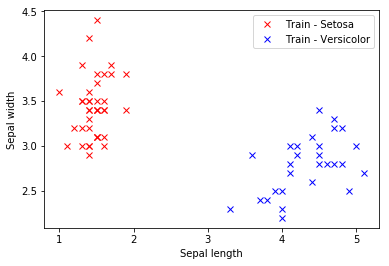

In [89]:
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train - Setosa')

plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bx', label='Train - Versicolor')

plt.xlabel("Sepal length") # надпись по оси X
plt.ylabel("Sepal width") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

In [90]:
# тренировочный датасет
X_train = df_iris[['petal_length']][:67].values # два параметра - sepal_length и sepal_width
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris[['petal_length']][67:].values # два параметра - sepal_length и sepal_width
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 1)
y_train.shape: (67,)
X_test.shape: (33, 1)
y_test.shape: (33,)


### Визуализация данных

### Создание и тренировка модели

In [93]:
class LogisticRegression:
    
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
    
    
    def log_loss(self, y_pred, y):
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / y_pred.shape[0]
    
    
    def loss_gradient_w(self, y_pred, y, X):
#         print("shape y: {}".format(y.shape))
#         print("shape y_pred: {}".format(y_pred.shape))
#         print("shape 3: {}".format((y_pred - y).shape))
#         print("shape 4: {}".format(X.shape))
        return np.sum((y_pred - y) * X) / y_pred.shape[0]
    
    
    def loss_gradient_b(self, y_pred, y):
        return np.sum(y_pred - y) / y_pred.shape[0]
    
    
    def fit(self, X, y):
        self.w = 0
        self.b = 0
        for i in range(self.epochs):
            print("{}/{}".format(i + 1, self.epochs), end=" ")
            y_pred = self.predict(X)
            self.w = self.w - self.lr * self.loss_gradient_w(y_pred, y, X)
            self.b = self.b - self.lr * self.loss_gradient_b(y_pred, y)
#             print("dw: {}".format(self.loss_gradient_w(self.predict(X), y, X)))
#             print("db: {}".format(self.loss_gradient_b(self.predict(X), y)))
            print("Log Loss: {} :: Accuracy: {}".format(self.log_loss(y_pred, y), self.accuracy(X, y)))
            
            
    def sigmoid(self, Z):
        return 1./(1 + 2.71828 ** (-Z))
    
    
    def predict(self, X):
        Z = self.w * X + self.b
        print("shape 1: {}".format(Z.shape))
        print("shape 2: {}".format(self.sigmoid(Z).shape))
        return self.sigmoid(Z)
    
    def accuracy(self, X, y):
        y_pred = np.round(self.predict(X))
        return np.sum(y_pred == y)/y_pred.shape[0]

In [96]:
model = LogisticRegression(10e-2, 200)
model.fit(X_train, y_train.reshape(-1, 1))

1/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6931471805599454 :: Accuracy: 0.417910447761194
2/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6719543287809036 :: Accuracy: 0.417910447761194
3/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6579971404619247 :: Accuracy: 0.417910447761194
4/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6480996588128567 :: Accuracy: 0.417910447761194
5/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6405007483240565 :: Accuracy: 0.417910447761194
6/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6342267609355259 :: Accuracy: 0.417910447761194
7/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6287340973530836 :: Accuracy: 0.417910447761194
8/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape

In [28]:
model.predict(6.0)

0.44186002899149834

### Оценка модели

In [20]:
########################################## TODO ########################################################

### Визуализация работы модели

In [287]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

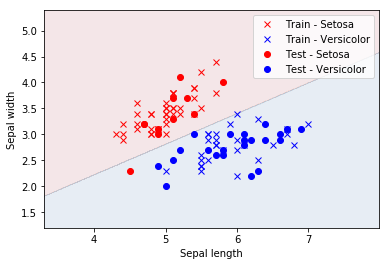

In [288]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train - Setosa')
plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bx', label='Train - Versicolor')
plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 'ro', label='Test - Setosa')
plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 'bo', label='Test - Versicolor')
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.1) # цветовые области

plt.xlabel("Sepal length") # надпись по оси X
plt.ylabel("Sepal width") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

## 2. Бинарная классификация с четырьмя параметрами на iris.csv 

### Предобработка данных

In [289]:
import numpy as np
import pandas as pd
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [280]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [290]:
DATA_DIR = "data" # путь к данным

In [292]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV
df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1, random_state=42) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')).iloc[:100].sample(frac=1, random_state=42).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,2.7,5.1,1.6,1
1,5.5,2.3,4.0,1.3,1
2,5.9,3.2,4.8,1.8,1
3,4.8,3.0,1.4,0.3,0
4,5.1,3.8,1.9,0.4,0


In [293]:
# тренировочный датасет
X_train = df_iris.drop(['species'], axis=1).iloc[:67].values # четыре параметра
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris.drop(['species'], axis=1).iloc[67:].values # четыре параметра
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 4)
y_train.shape: (67,)
X_test.shape: (33, 4)
y_test.shape: (33,)


### Создание и тренировка модели

In [97]:
class LogisticRegression:
    
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
    
    
    def log_loss(self, y_pred, y):
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / y_pred.shape[0]
    
    
    def loss_gradient_w(self, y_pred, y, X):
#         print("shape y: {}".format(y.shape))
#         print("shape y_pred: {}".format(y_pred.shape))
#         print("shape 3: {}".format((y_pred - y).shape))
#         print("shape 4: {}".format(X.shape))
        return np.sum((y_pred - y) * X) / y_pred.shape[0]
    
    
    def loss_gradient_b(self, y_pred, y):
        return np.sum(y_pred - y) / y_pred.shape[0]
    
    
    def fit(self, X, y):
        self.w = 0
        self.b = 0
        for i in range(self.epochs):
            print("{}/{}".format(i + 1, self.epochs), end=" ")
            y_pred = self.predict(X)
            self.w = self.w - self.lr * self.loss_gradient_w(y_pred, y, X)
            self.b = self.b - self.lr * self.loss_gradient_b(y_pred, y)
#             print("dw: {}".format(self.loss_gradient_w(self.predict(X), y, X)))
#             print("db: {}".format(self.loss_gradient_b(self.predict(X), y)))
            print("Log Loss: {} :: Accuracy: {}".format(self.log_loss(y_pred, y), self.accuracy(X, y)))
            
            
    def sigmoid(self, Z):
        return 1./(1 + 2.71828 ** (-Z))
    
    
    def predict(self, X):
        Z = self.w * X + self.b
        print("shape 1: {}".format(Z.shape))
        print("shape 2: {}".format(self.sigmoid(Z).shape))
        return self.sigmoid(Z)
    
    def accuracy(self, X, y):
        y_pred = np.round(self.predict(X))
        return np.sum(y_pred == y)/y_pred.shape[0]

In [98]:
model = LogisticRegression(10e-2, 200)
model.fit(X_train, y_train.reshape(-1, 1))

1/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6931471805599454 :: Accuracy: 0.417910447761194
2/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6719543287809036 :: Accuracy: 0.417910447761194
3/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6579971404619247 :: Accuracy: 0.417910447761194
4/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6480996588128567 :: Accuracy: 0.417910447761194
5/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6405007483240565 :: Accuracy: 0.417910447761194
6/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6342267609355259 :: Accuracy: 0.417910447761194
7/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape 2: (67, 1)
Log Loss: 0.6287340973530836 :: Accuracy: 0.417910447761194
8/200 shape 1: (67, 1)
shape 2: (67, 1)
shape 1: (67, 1)
shape

### Оценка модели

In [20]:
########################################## TODO ########################################################